In [7]:
import keras
import tensorflow
import shutil
import os
import zipfile
import time
from PIL import Image
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
!unzip /content/drive/MyDrive/dataset1.zip -d /content/dataset

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: /content/dataset/dataset1/train/Ъ/Ъ.279.jpg  
  inflating: /content/dataset/dataset1/train/Ъ/Ъ.28.jpg  
  inflating: /content/dataset/dataset1/train/Ъ/Ъ.280.jpg  
  inflating: /content/dataset/dataset1/train/Ъ/Ъ.281.jpg  
  inflating: /content/dataset/dataset1/train/Ъ/Ъ.282.jpg  
  inflating: /content/dataset/dataset1/train/Ъ/Ъ.283.jpg  
  inflating: /content/dataset/dataset1/train/Ъ/Ъ.284.jpg  
  inflating: /content/dataset/dataset1/train/Ъ/Ъ.285.jpg  
  inflating: /content/dataset/dataset1/train/Ъ/Ъ.286.jpg  
  inflating: /content/dataset/dataset1/train/Ъ/Ъ.287.jpg  
  inflating: /content/dataset/dataset1/train/Ъ/Ъ.288.jpg  
  inflating: /content/dataset/dataset1/train/Ъ/Ъ.289.jpg  
  inflating: /content/dataset/dataset1/train/Ъ/Ъ.29.jpg  
  inflating: /content/dataset/dataset1/train/Ъ/Ъ.290.jpg  
  inflating: /content/dataset/dataset1/train/Ъ/Ъ.291.jpg  
  inflating: /content/dataset/dataset1/train/Ъ/Ъ.

In [10]:
# Каталог с данными для обучения
train_dir = '/content/dataset/dataset1/train'
# Каталог с данными для проверки
val_dir = '/content/dataset/dataset1/val'
# Каталог с данными для тестирования
test_dir = '/content/dataset/dataset1/test'
# Часть набора данных для тестирования
# Размеры изображения
img_width, img_height = 150, 150
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)
# Количество эпох
epochs = 30
# Размер мини-выборки
batch_size = 64
# Количество изображений для обучения
nb_train_samples = 15430
# Количество изображений для проверки
nb_validation_samples = 3288
# Количество изображений для тестирования
nb_test_samples = 3358

In [11]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

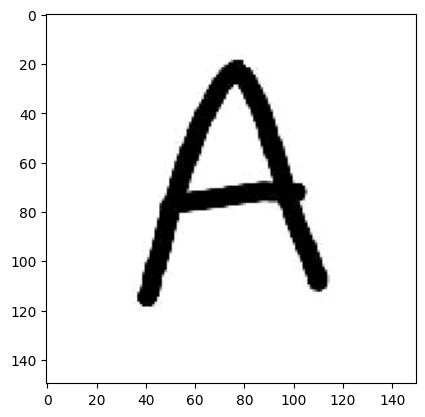

In [13]:
image_file_name = train_dir + '/А/А.1.jpg'
img = load_img(image_file_name, target_size=(150, 150))
plt.imshow(img)

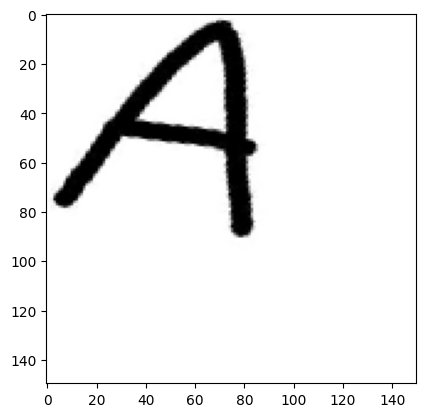

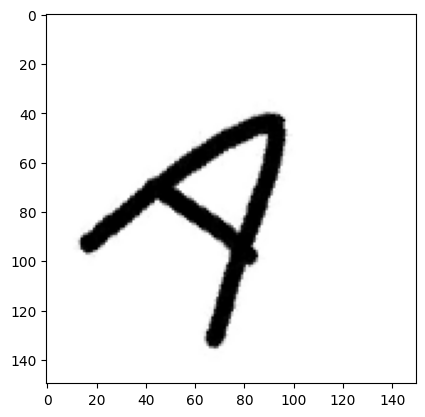

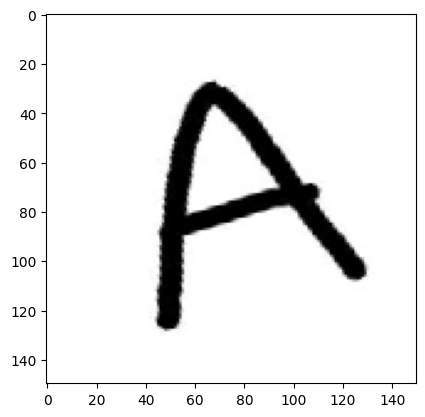

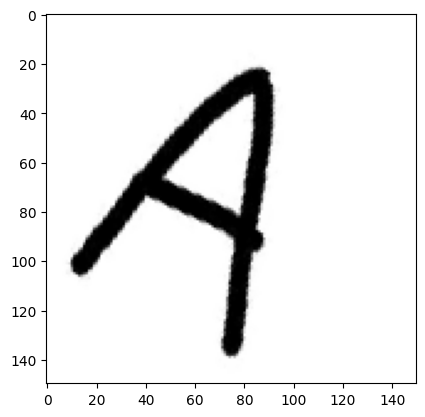

In [19]:
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(img_to_array(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [20]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 15323 images belonging to 48 classes.


In [21]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [22]:
val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 3288 images belonging to 48 classes.


In [23]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 3358 images belonging to 48 classes.


In [24]:
vgg16_net = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [25]:
vgg16_net.trainable = False

In [26]:
vgg16_net.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [8]:
model = Sequential()
# Добавляем в модель сеть VGG16 вместо слоя
model.add(vgg16_net)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(48))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NameError: name 'vgg16_net' is not defined

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 48)                12336     
                                                                 
 activation_1 (Activation)   (None, 48)                0

In [4]:
model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_generator,
    validation_steps=25)

NameError: name 'model' is not defined

## Оцениваем качество работы сети с помощью генератора

In [ ]:
scores = model.evaluate_generator(test_generator, 50)

In [ ]:
print("Аккуратность на тестовых данных: %.2f%%" % (scores[1]*100))

In [ ]:
vgg16_net.trainable = True
trainable = False
for layer in vgg16_net.layers:
    if layer.name == 'block5_conv1':
        trainable = True
    layer.trainable = trainable

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])

In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=2,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

In [ ]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Аккуратность на тестовых данных: %.2f%%" % (scores[1]*100))